

# Task5:Prediction Using Descision Tree Algorithm

## By:Sayed Mahmoud

## Table of Contents
<ul>
<li><a href="#import">Importing Data</a></li>
<li><a href="#visualize">Data Visualization</a></li>
<li><a href="#Model">Building Model</a></li>
<li><a href="#Ques">Model Visualization</a></li>
</ul>

<a id='import'></a>
## Importing Data

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import scikitplot as skplt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from IPython.display import Image 
from six import StringIO   
import pydotplus

In [2]:
#import data
df=pd.read_csv("Iris_.csv")

In [3]:
#show data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#statistics information about data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#sheck for dupilicates
df.duplicated().sum()

0

In [7]:
df['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)

In [8]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df.drop(["Id"],axis=1,inplace=True)

<a id='visualize'></a>
## Data Visualization

In [10]:
# get only numeric data 
numerical = [i for i in df.columns if (df[i].dtype in ['int64' , 'float64']) and (df[i].nunique() > 2)  ]
continuouscols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [11]:
# numerical
sns.set()
def n_plot():
    for predictor,i in zip(continuouscols,numerical) :
        plt.subplots(1,2,figsize=(15,6))
        plt.subplot(1,2,1)
        plt.hist(df[i])
        plt.title(i);
        plt.subplot(1,2,2)
        ax = sns.boxplot(x="Species", y=predictor, data=df)
        ax = sns.stripplot(x="Species", y=predictor, data=df, jitter=True, edgecolor="gray")
        plt.title(i);
        yield()

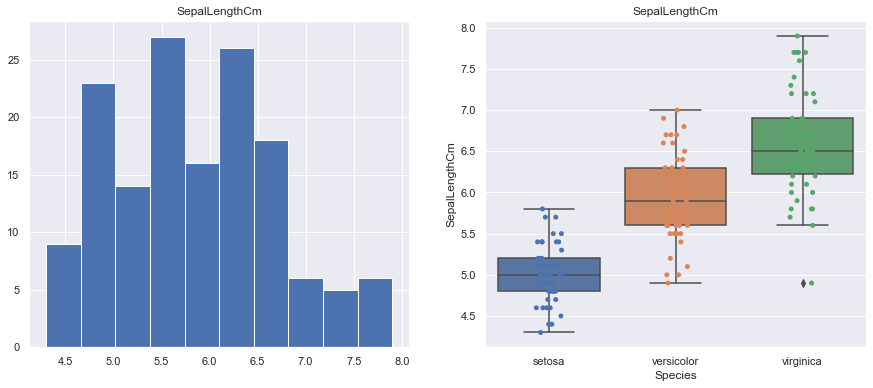

In [12]:
my_plot = n_plot()
next(my_plot);

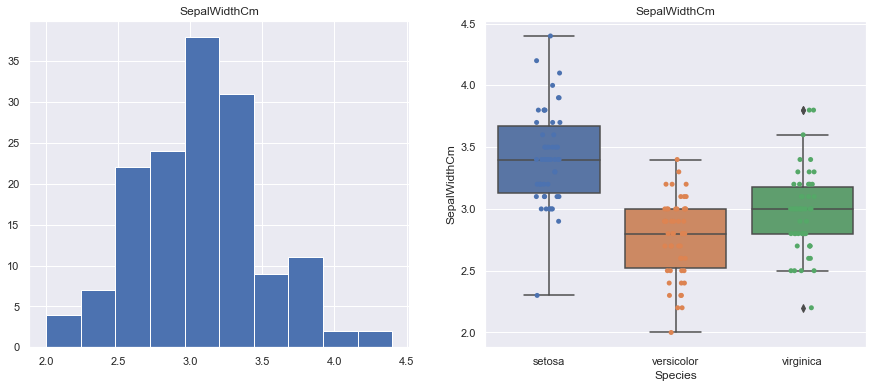

In [13]:
next(my_plot);

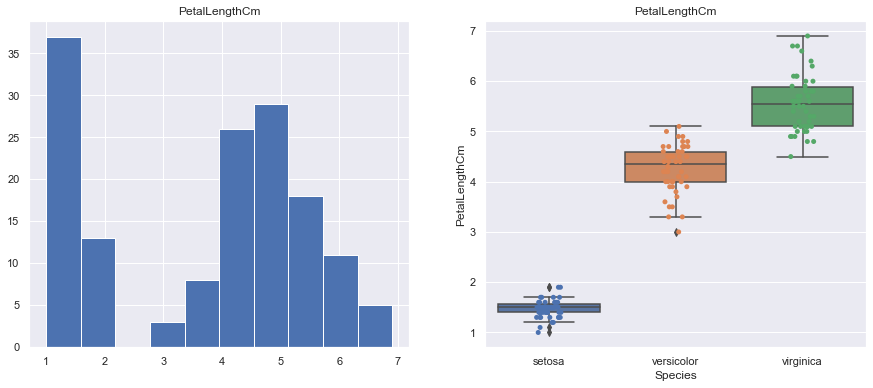

In [14]:
next(my_plot);

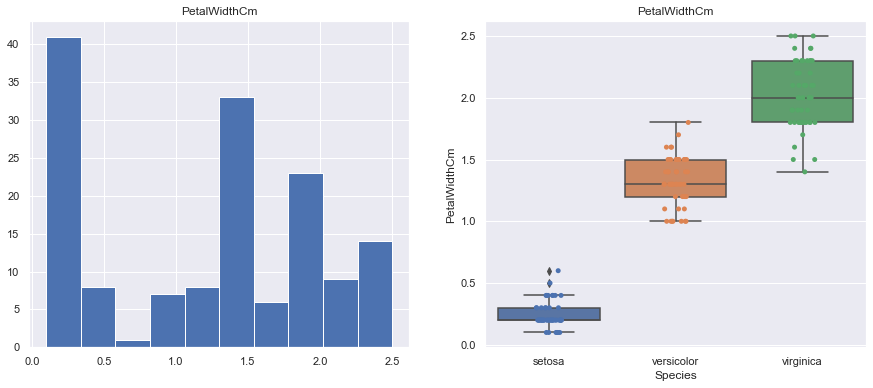

In [15]:
next(my_plot);

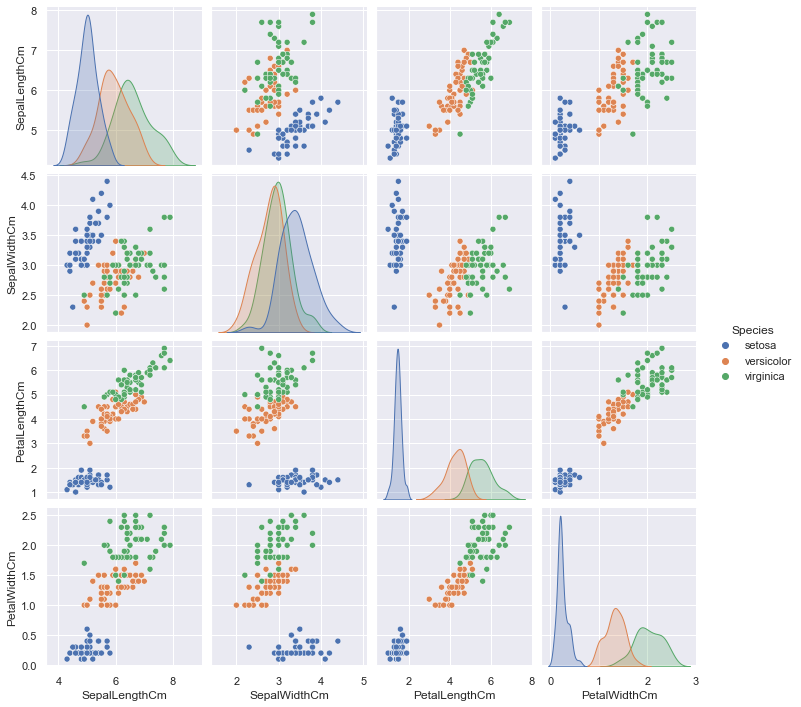

In [16]:
sns.pairplot(df , hue='Species');

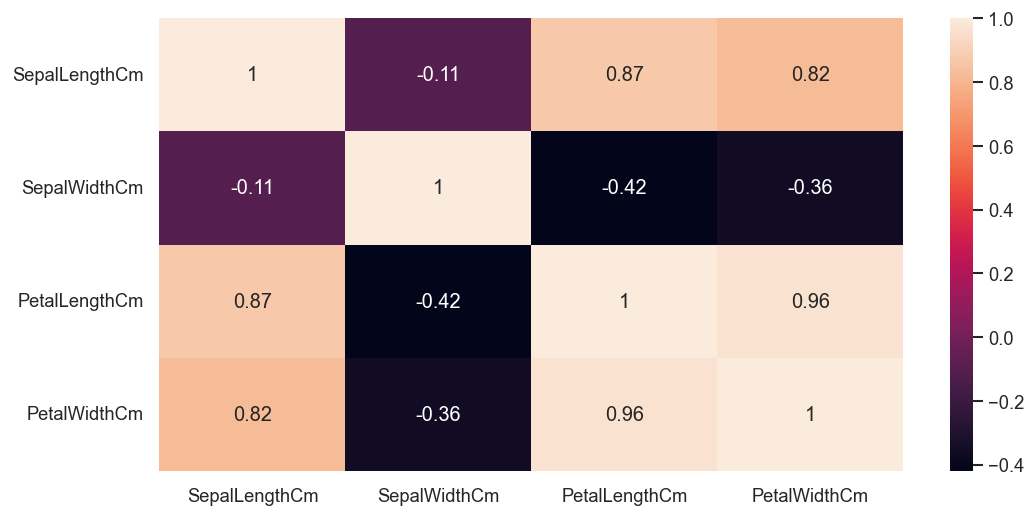

In [17]:
plt.figure(figsize=(10,5), dpi = 120)
sns.heatmap(df.corr() , annot = True);

<a id='Model'></a>
## Building Model

In [18]:
x = df.drop('Species', axis=1)
y= df.Species
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [19]:
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X
x=PredictorScalerFit.transform(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [21]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(x_train,y_train)
y_pred=DTree.predict(x_test)

DecisionTreeClassifier(max_depth=5)


In [22]:
x_train_prediction=DTree.predict(x_train)

In [23]:
# accuracy score on training data
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : {}%\n'.format(training_data_accuracy*100))

# accuracy score on training data
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of test data : {}% \n'.format(test_data_accuracy*100))


print('\n Classification Report: \n',classification_report(y_test, y_pred))

Accuracy score of training data : 99.04761904761905%

Accuracy score of test data : 91.11111111111111% 


 Classification Report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.88      0.88        16
   virginica       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



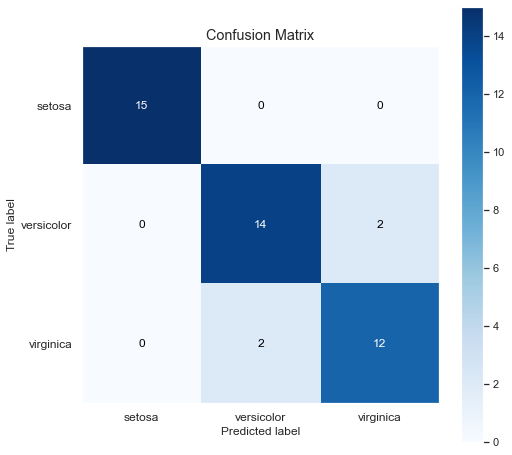

In [24]:
cm = skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8, 8), normalize=False)

<a id='Ques'></a>

## Model Visualization

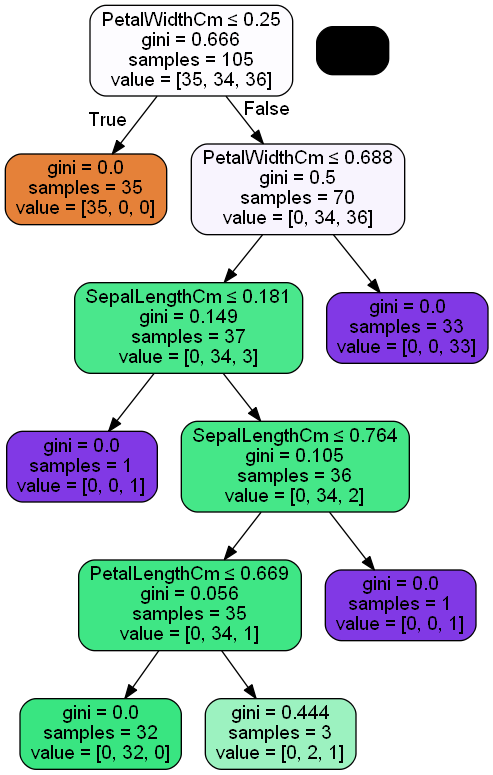

In [25]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=continuouscols,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
NewData=pd.DataFrame(data=[[5.1, 3.5, 3.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],[4.7, 3.2, 6.3, 2.2],[4.6, 3.1, 1.5, 0.2],
       [5.7, 2.0, 4.2, 1.2],[5.8, 4.0, 1.2, 0.2],[5.1, 3.5, 1.4, 0.8],
       [5.5, 2.3, 4.0, 1.3],[5.5,2.3,4.0,1.3],[5.1,3.8,1.6,0.7]], columns=continuouscols)
NewData

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,3.4,0.2
1,4.7,3.2,1.3,0.2
2,4.7,3.2,6.3,2.2
3,4.6,3.1,1.5,0.2
4,5.7,2.0,4.2,1.2
5,5.8,4.0,1.2,0.2
6,5.1,3.5,1.4,0.8
7,5.5,2.3,4.0,1.3
8,5.5,2.3,4.0,1.3
9,5.1,3.8,1.6,0.7


In [27]:
new_X=NewData.values
new_X

array([[5.1, 3.5, 3.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.7, 3.2, 6.3, 2.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.7, 2. , 4.2, 1.2],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.5, 1.4, 0.8],
       [5.5, 2.3, 4. , 1.3],
       [5.5, 2.3, 4. , 1.3],
       [5.1, 3.8, 1.6, 0.7]])

In [28]:
Predictedvalues=DTree.predict(new_X)
Predictedvalues

array(['setosa', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica'], dtype=object)

In [29]:
 def predictflower(inpData):
    new_X=NewData.values
    pred=DTree.predict(new_X)
    inpData['Prediction']=pred
    return(inpData)

In [30]:
predictflower(inpData=NewData)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Prediction
0,5.1,3.5,3.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.7,3.2,6.3,2.2,virginica
3,4.6,3.1,1.5,0.2,setosa
4,5.7,2.0,4.2,1.2,virginica
5,5.8,4.0,1.2,0.2,setosa
6,5.1,3.5,1.4,0.8,virginica
7,5.5,2.3,4.0,1.3,virginica
8,5.5,2.3,4.0,1.3,virginica
9,5.1,3.8,1.6,0.7,virginica
